In [1]:
%matplotlib inline
#%pylab
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mpc
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import scipy
from scipy import interpolate
import pandas as pd
import itertools
from root_numpy import root2array, root2rec, tree2rec, array2root
from ROOT import TChain

In [2]:
def get_data_frame(tfile,ttree):
    rec = root2array(tfile,ttree)
    return pd.DataFrame(rec)

print 'Reading in signal...'
ALL     = get_data_frame("/Users/vgenty/Dropbox/ana_ALL.root","out_tree")


Reading in signal...


	!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
	!!!!~~~~~~~~~~~~~~NO CUTS~~~~~~~~~~~~~!!!!
	!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


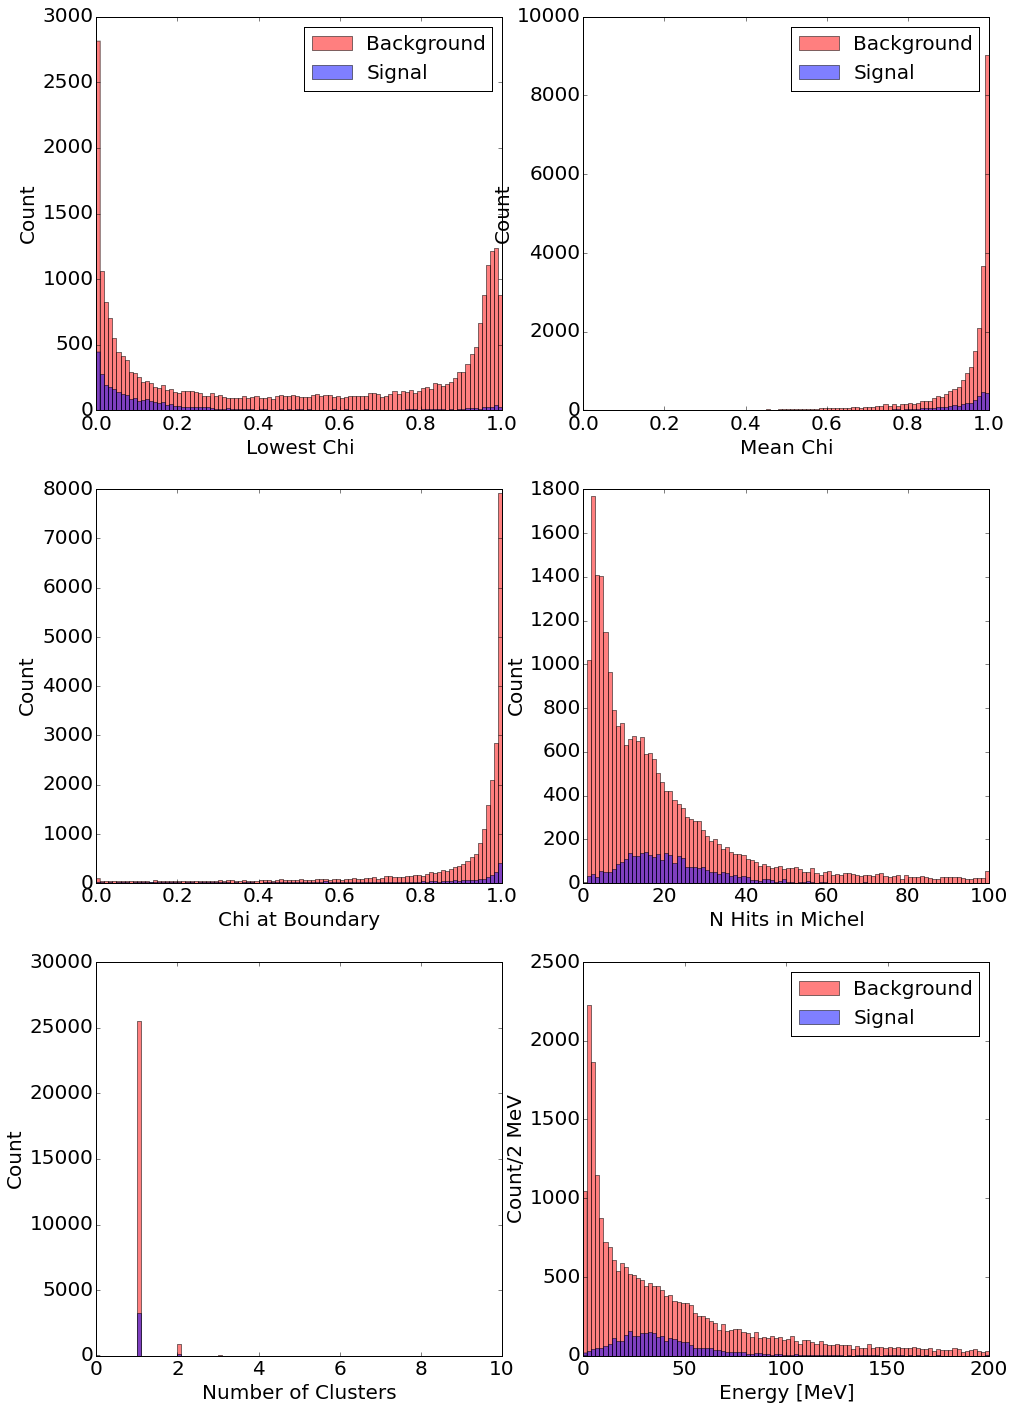

In [3]:
print "\t!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!"
print "\t!!!!~~~~~~~~~~~~~~NO CUTS~~~~~~~~~~~~~!!!!"
print "\t!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!"
S = SIGNAL.query('_largest_cluster_charge > 0')
B = BACKGROUND.query('_largest_cluster_charge > 0')

plt.figure(figsize=(16,24))

plt.subplot(3,2,1)
plt.hist(np.array(B['lowest_chi']),bins=100,range=(0,1),color='r',alpha=0.5,label="Background")
plt.hist(np.array(S['lowest_chi']),bins=100,range=(0,1),color='b',alpha=0.5,label="Signal")
plt.tick_params(labelsize=20)

plt.xlabel('Lowest Chi',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.legend(fontsize=20)

plt.subplot(3,2,2)
plt.hist(np.array(B['mean_chi']),bins=100,range=(0,1),color='r',alpha=0.5,label="Background")
plt.hist(np.array(S['mean_chi']),bins=100,range=(0,1),color='b',alpha=0.5,label="Signal")
plt.tick_params(labelsize=20)

plt.xlabel('Mean Chi',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.legend(fontsize=20)

plt.subplot(3,2,3)
plt.hist(np.array(B['chi_at_boundary']),bins=100,range=(0,1),color='r',alpha=0.5,label="Background")
plt.hist(np.array(S['chi_at_boundary']),bins=100,range=(0,1),color='b',alpha=0.5,label="Signal")
plt.tick_params(labelsize=20)

plt.xlabel('Chi at Boundary',fontsize=20)
plt.ylabel('Count',fontsize=20)

plt.subplot(3,2,4)
plt.hist(np.array(B['_n_hits_in_largest_cluster_michel']),bins=100,range=(0,100),color='r',alpha=0.5,label="Background")
plt.hist(np.array(S['_n_hits_in_largest_cluster_michel']),bins=100,range=(0,100),color='b',alpha=0.5,label="Signal")
plt.tick_params(labelsize=20)

plt.xlabel('N Hits in Michel',fontsize=20)
plt.ylabel('Count',fontsize=20)

plt.subplot(3,2,5)
plt.hist(np.array(B['_number_of_clusters']),bins=100,range=(0,10),color='r',alpha=0.5,label="Background")
plt.hist(np.array(S['_number_of_clusters']),bins=100,range=(0,10),color='b',alpha=0.5,label="Signal")
plt.tick_params(labelsize=20)

plt.xlabel('Number of Clusters',fontsize=20)
plt.ylabel('Count',fontsize=20)

plt.subplot(3,2,6)
plt.hist(np.array(B['_largest_cluster_charge'])*0.008*1.4,bins=100,range=(0,200),color='r',alpha=0.5,label="Background")
plt.hist(np.array(S['_largest_cluster_charge'])*0.008*1.4,bins=100,range=(0,200),color='b',alpha=0.5,label="Signal")
plt.tick_params(labelsize=20)

plt.xlabel('Energy [MeV]',fontsize=20)
plt.ylabel('Count/2 MeV',fontsize=20)
plt.legend(fontsize=20)
plt.show()


	!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
	!!!!~~~~~~~~~~~~CORRELATIONS~~~~~~~~~~!!!!
	!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


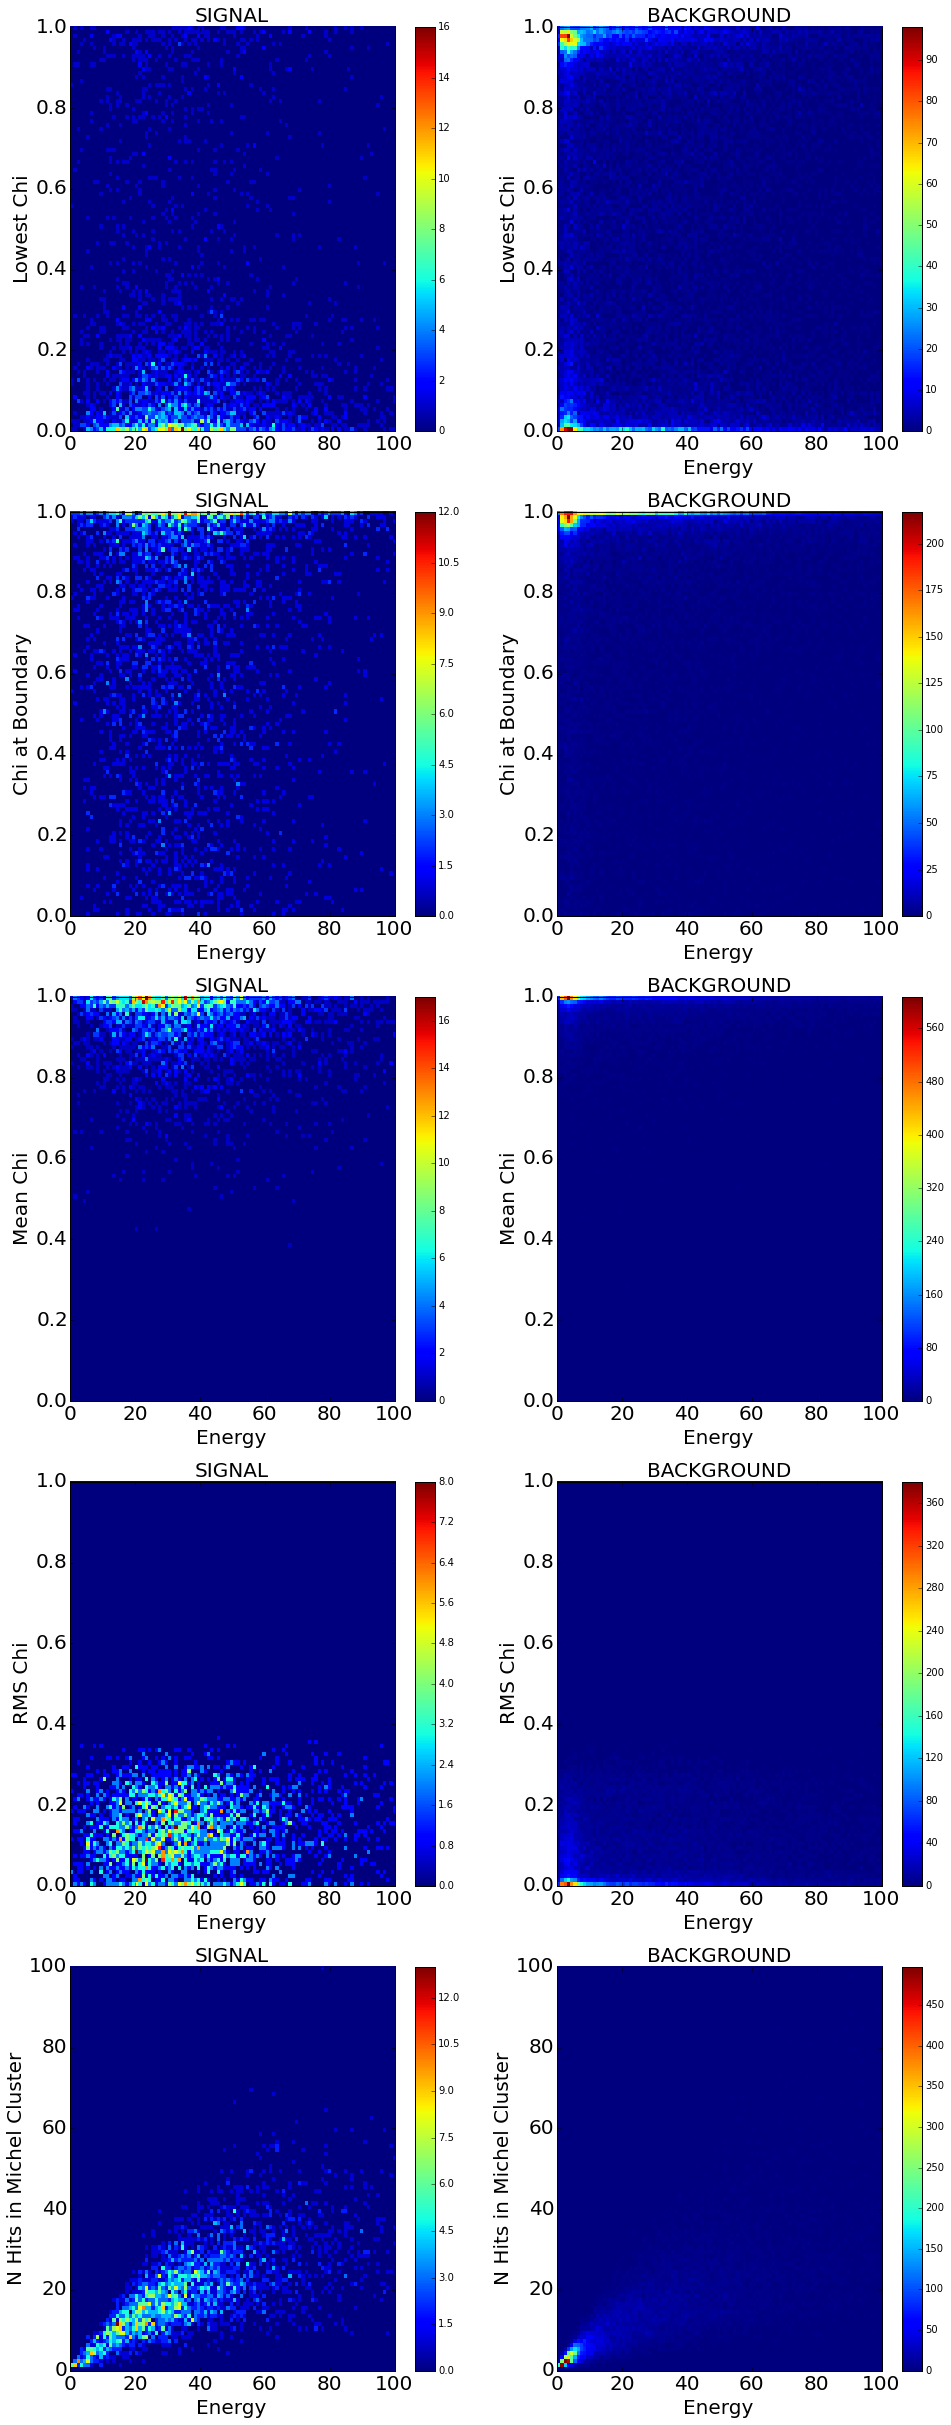

In [4]:
print "\t!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!"
print "\t!!!!~~~~~~~~~~~~CORRELATIONS~~~~~~~~~~!!!!"
print "\t!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!"
S = SIGNAL.query('_largest_cluster_charge > 0')
B = BACKGROUND.query('_largest_cluster_charge > 0')

plt.figure(figsize=(16,42))

plt.subplot(5,2,1)
Q1 = plt.hist2d(np.array(S['_largest_cluster_charge'])*0.008*1.4,
                np.array(S['lowest_chi']), 
                bins = 100,
                range=np.array([(0, 100), (0,1)]))
plt.colorbar()
plt.tick_params(labelsize=20)
plt.title("SIGNAL",fontsize=20)
plt.xlabel('Energy',fontsize=20)
plt.ylabel('Lowest Chi',fontsize=20)

plt.subplot(5,2,2)
Q2 = plt.hist2d(np.array(B['_largest_cluster_charge'])*0.008*1.4,
                np.array(B['lowest_chi']), 
                bins = 100,
                range=np.array([(0, 100), (0,1)]))
plt.tick_params(labelsize=20)
plt.colorbar()
plt.title("BACKGROUND",fontsize=20)
plt.xlabel('Energy',fontsize=20)
plt.ylabel('Lowest Chi',fontsize=20)

plt.subplot(5,2,3)
Q3 = plt.hist2d(np.array(S['_largest_cluster_charge'])*0.008*1.4,
                np.array(S['chi_at_boundary']), 
                bins = 100,
                range=np.array([(0, 100), (0,1)]))
plt.colorbar()
plt.tick_params(labelsize=20)
plt.title("SIGNAL",fontsize=20)
plt.xlabel('Energy',fontsize=20)
plt.ylabel('Chi at Boundary',fontsize=20)

plt.subplot(5,2,4)
Q4 = plt.hist2d(np.array(B['_largest_cluster_charge'])*0.008*1.4,
                np.array(B['chi_at_boundary']), 
                bins = 100,
                range=np.array([(0, 100), (0,1)]))
plt.tick_params(labelsize=20)
plt.colorbar()
plt.title("BACKGROUND",fontsize=20)
plt.xlabel('Energy',fontsize=20)
plt.ylabel('Chi at Boundary',fontsize=20)

plt.subplot(5,2,5)
Q3 = plt.hist2d(np.array(S['_largest_cluster_charge'])*0.008*1.4,
                np.array(S['mean_chi']), 
                bins = 100,
                range=np.array([(0, 100), (0,1)]))
plt.colorbar()
plt.tick_params(labelsize=20)
plt.title("SIGNAL",fontsize=20)
plt.xlabel('Energy',fontsize=20)
plt.ylabel('Mean Chi',fontsize=20)

plt.subplot(5,2,6)
Q4 = plt.hist2d(np.array(B['_largest_cluster_charge'])*0.008*1.4,
                np.array(B['mean_chi']), 
                bins = 100,
                range=np.array([(0, 100), (0,1)]))
plt.tick_params(labelsize=20)
plt.colorbar()
plt.title("BACKGROUND",fontsize=20)
plt.xlabel('Energy',fontsize=20)
plt.ylabel('Mean Chi',fontsize=20)

plt.subplot(5,2,7)
Q3 = plt.hist2d(np.array(S['_largest_cluster_charge'])*0.008*1.4,
                np.array(S['rms_chi']), 
                bins = 100,
                range=np.array([(0, 100), (0,1)]))
plt.colorbar()
plt.tick_params(labelsize=20)
plt.title("SIGNAL",fontsize=20)
plt.xlabel('Energy',fontsize=20)
plt.ylabel('RMS Chi',fontsize=20)

plt.subplot(5,2,8)
Q4 = plt.hist2d(np.array(B['_largest_cluster_charge'])*0.008*1.4,
                np.array(B['rms_chi']), 
                bins = 100,
                range=np.array([(0, 100), (0,1)]))
plt.tick_params(labelsize=20)
plt.colorbar()
plt.title("BACKGROUND",fontsize=20)
plt.xlabel('Energy',fontsize=20)
plt.ylabel('RMS Chi',fontsize=20)


plt.subplot(5,2,9)
Q3 = plt.hist2d(np.array(S['_largest_cluster_charge'])*0.008*1.4,
                np.array(S['_n_hits_in_largest_cluster_michel']), 
                bins = 100,
                range=np.array([(0, 100), (0,100)]))
plt.colorbar()
plt.tick_params(labelsize=20)
plt.title("SIGNAL",fontsize=20)
plt.xlabel('Energy',fontsize=20)
plt.ylabel('N Hits in Michel Cluster',fontsize=20)

plt.subplot(5,2,10)
Q4 = plt.hist2d(np.array(B['_largest_cluster_charge'])*0.008*1.4,
                np.array(B['_n_hits_in_largest_cluster_michel']), 
                bins = 100,
                range=np.array([(0, 100), (0,100)]))
plt.tick_params(labelsize=20)
plt.colorbar()
plt.title("BACKGROUND",fontsize=20)
plt.xlabel('Energy',fontsize=20)
plt.ylabel('N Hits in Michel Cluster',fontsize=20)
plt.show()


	!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
	!!!!~~~~~~~~~~~~WITH CUTS~~~~~~~~~~~~~!!!!
	!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Applying precuts...
Signal


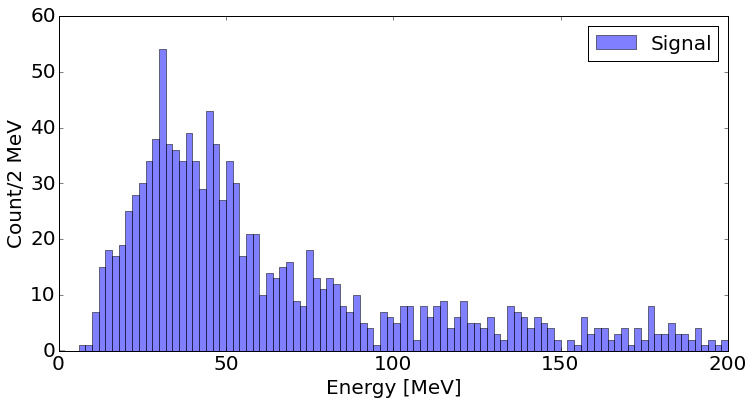

In [5]:
print "\t!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!"
print "\t!!!!~~~~~~~~~~~~WITH CUTS~~~~~~~~~~~~~!!!!"
print "\t!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!"

print 'Applying precuts...'
print 'Signal'

S = ALL.query('_largest_cluster_charge > 0')
S = S.query('_number_of_clusters >= 1')
S = S.query('_n_hits_in_largest_cluster_michel >= 10')
S = S.query('lowest_chi < 0.25')
S = S.query('chi_at_boundary < 0.4')
S = S.query('mean_chi > 0.8')


#print 'Background'
#B = BACKGROUND.query('_largest_cluster_charge > 0')
#B = B.query('_number_of_clusters >= 1')
#B = B.query('_n_hits_in_largest_cluster_michel >= 10')
#B = B.query('lowest_chi < 0.25')
#B = B.query('chi_at_boundary < 0.4')
#B = B.query('mean_chi > 0.8')



plt.figure(figsize=(12,6))
#plt.hist(np.array(B['_largest_cluster_charge'])*0.008*1.4,bins=100,range=(0,200),color='r',alpha=0.5,label="Background")
plt.hist(np.array(S['_largest_cluster_charge'])*0.008*1.4,bins=100,range=(0,200),color='b',alpha=0.5,label="Signal")
plt.tick_params(labelsize=20)

plt.xlabel('Energy [MeV]',fontsize=20)
plt.ylabel('Count/2 MeV',fontsize=20)
plt.legend(fontsize=20)
plt.savefig('sample.pdf')
plt.show()


	!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
	!!!!~~~~~~~~~~~~WITH CUTS~~~~~~~~~~~~~!!!!
	!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


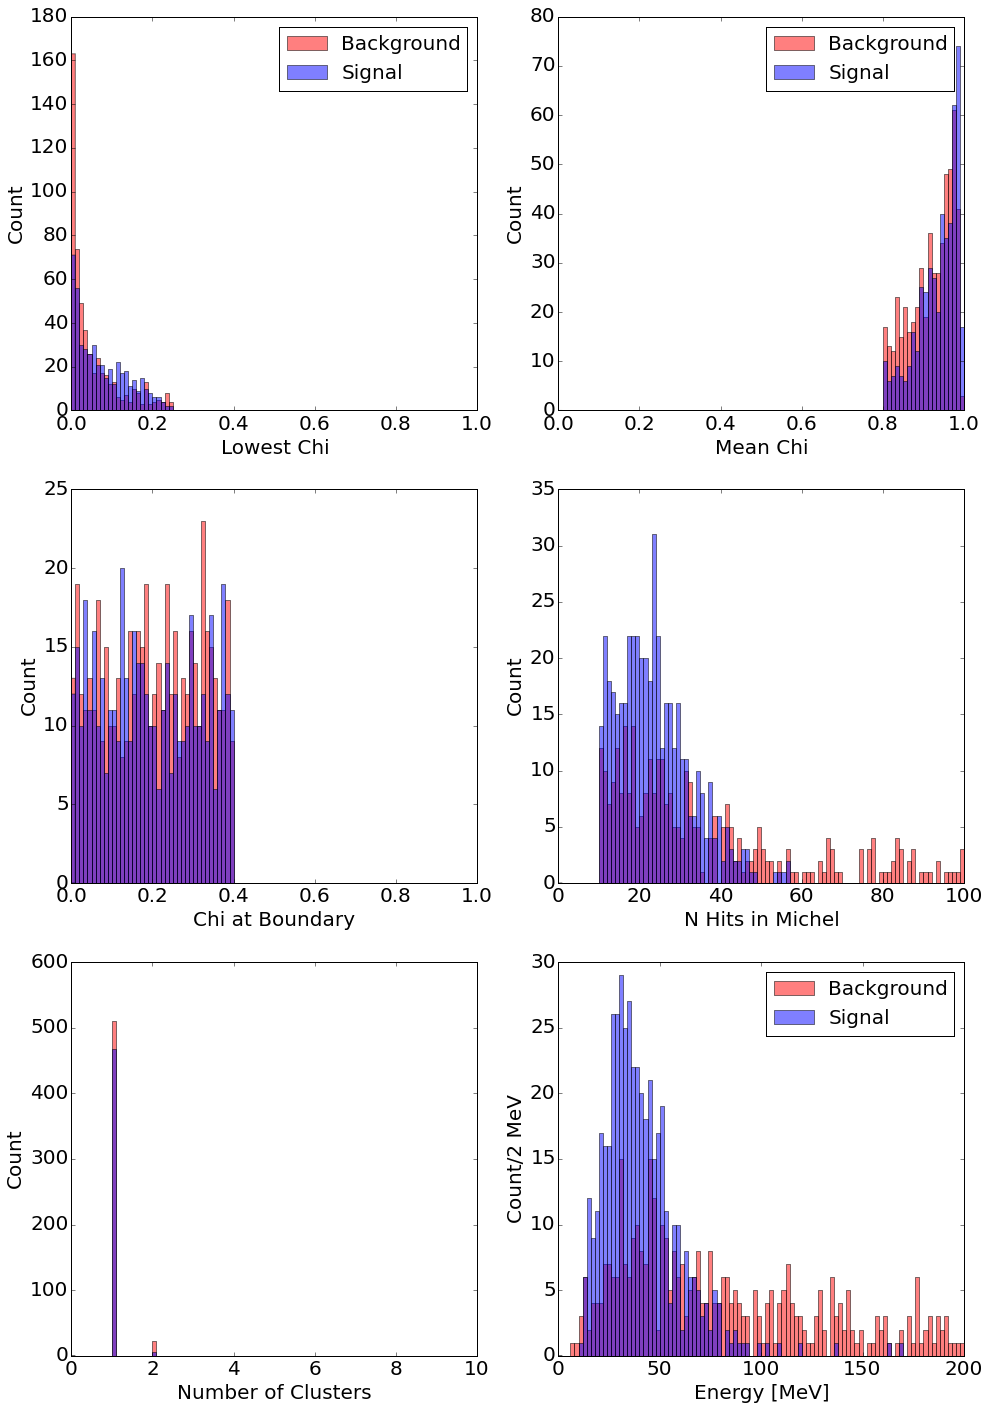

In [6]:
print "\t!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!"
print "\t!!!!~~~~~~~~~~~~WITH CUTS~~~~~~~~~~~~~!!!!"
print "\t!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!"

plt.figure(figsize=(16,24))

plt.subplot(3,2,1)
plt.hist(np.array(B['lowest_chi']),bins=100,range=(0,1),color='r',alpha=0.5,label="Background")
plt.hist(np.array(S['lowest_chi']),bins=100,range=(0,1),color='b',alpha=0.5,label="Signal")
plt.tick_params(labelsize=20)

plt.xlabel('Lowest Chi',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.legend(fontsize=20)

plt.subplot(3,2,2)
plt.hist(np.array(B['mean_chi']),bins=100,range=(0,1),color='r',alpha=0.5,label="Background")
plt.hist(np.array(S['mean_chi']),bins=100,range=(0,1),color='b',alpha=0.5,label="Signal")
plt.tick_params(labelsize=20)

plt.xlabel('Mean Chi',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.legend(fontsize=20)

plt.subplot(3,2,3)
plt.hist(np.array(B['chi_at_boundary']),bins=100,range=(0,1),color='r',alpha=0.5,label="Background")
plt.hist(np.array(S['chi_at_boundary']),bins=100,range=(0,1),color='b',alpha=0.5,label="Signal")
plt.tick_params(labelsize=20)

plt.xlabel('Chi at Boundary',fontsize=20)
plt.ylabel('Count',fontsize=20)

plt.subplot(3,2,4)
plt.hist(np.array(B['_n_hits_in_largest_cluster_michel']),bins=100,range=(0,100),color='r',alpha=0.5,label="Background")
plt.hist(np.array(S['_n_hits_in_largest_cluster_michel']),bins=100,range=(0,100),color='b',alpha=0.5,label="Signal")
plt.tick_params(labelsize=20)

plt.xlabel('N Hits in Michel',fontsize=20)
plt.ylabel('Count',fontsize=20)

plt.subplot(3,2,5)
plt.hist(np.array(B['_number_of_clusters']),bins=100,range=(0,10),color='r',alpha=0.5,label="Background")
plt.hist(np.array(S['_number_of_clusters']),bins=100,range=(0,10),color='b',alpha=0.5,label="Signal")
plt.tick_params(labelsize=20)

plt.xlabel('Number of Clusters',fontsize=20)
plt.ylabel('Count',fontsize=20)

plt.subplot(3,2,6)
plt.hist(np.array(B['_largest_cluster_charge'])*0.008*1.4,bins=100,range=(0,200),color='r',alpha=0.5,label="Background")
plt.hist(np.array(S['_largest_cluster_charge'])*0.008*1.4,bins=100,range=(0,200),color='b',alpha=0.5,label="Signal")
plt.tick_params(labelsize=20)

plt.xlabel('Energy [MeV]',fontsize=20)
plt.ylabel('Count/2 MeV',fontsize=20)
plt.legend(fontsize=20)
plt.show()